In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [2]:
df_test.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [3]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

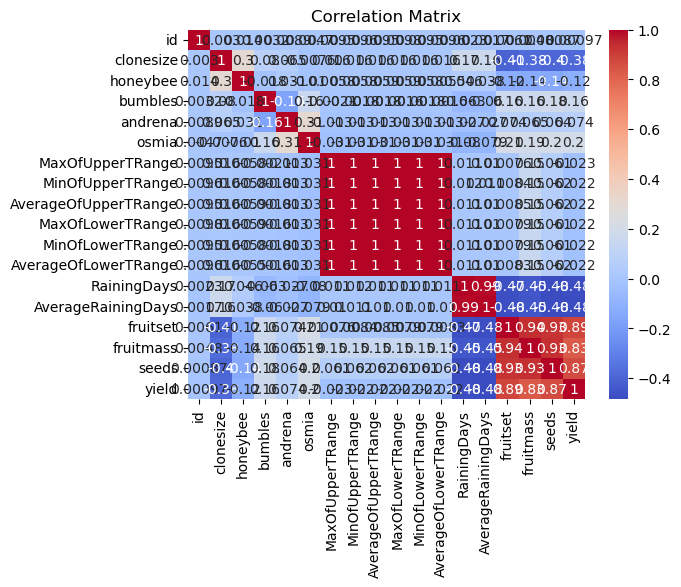

In [4]:
# Calculate the correlation matrix
corr = df_train.corr()

# Create a heatmap plot of the correlation matrix
sns.heatmap(corr, annot=True, cmap="coolwarm")

# Set plot title
plt.title("Correlation Matrix")

# Display the plot
plt.show()


# Training a model

In [17]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

# Define the target variables and variables to make presictions on
X = df_train.drop(['id', 'MaxOfUpperTRange', 'MinOfUpperTRange', 
                   'AverageOfUpperTRange', 'MaxOfLowerTRange', 
                   'MinOfLowerTRange', 'AverageOfLowerTRange'], axis=1)
y = df_train['yield']
# Train/test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)
# Define and train the model
model = LinearRegression()
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)

-1.8189894035458565e-12
[-1.65044786e-14 -4.25104396e-13 -1.61835855e-11 -7.96679401e-12
  4.17610072e-12  9.81567258e-14 -3.14986972e-12  1.54041680e-11
  5.69907636e-12 -9.33688890e-14  1.00000000e+00]


In [21]:
X_train.shape, y_train.shape

((10243, 11), (10243,))

In [20]:
y_pred = model.predict(X_test)

ValueError: x and y must be the same size

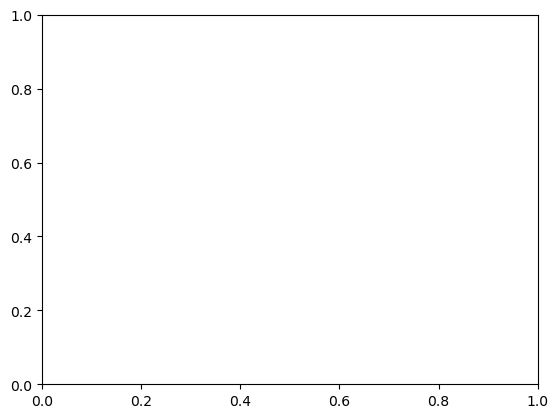

In [24]:
plt.scatter(X_train[:len(y_train)], y_train, color='g')
plt.show()

In [5]:
import pandas as pd
import statsmodels.api as sm


# Select the columns for the independent variables
cols = [col for col in df_train.columns if col not in ['id', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange']]

# Define the model
model = sm.OLS(df_train['yield'], df_train[cols]).fit()

# Get the model predictions
predictions = model.predict(df_train[cols])

In [6]:
df_train['yield']

0        4476.81146
1        5548.12201
2        6869.77760
3        6880.77590
4        7479.93417
            ...    
15284    7667.83619
15285    3680.56025
15286    4696.44394
15287    6772.93347
15288    5867.99722
Name: yield, Length: 15289, dtype: float64

In [7]:
list(df_test.columns)

['id',
 'clonesize',
 'honeybee',
 'bumbles',
 'andrena',
 'osmia',
 'MaxOfUpperTRange',
 'MinOfUpperTRange',
 'AverageOfUpperTRange',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'AverageOfLowerTRange',
 'RainingDays',
 'AverageRainingDays',
 'fruitset',
 'fruitmass',
 'seeds']